# COMP 9517 Lab3

Written by: Borong Xu 

Environment:
- Python 3.11
- sklearn 1.5
- pandas 2.2
- torch 2.5
- numpy 2.1
- seaborn 0.13
- matplotlib 3.9


### Library import

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time
import pickle

### Prepare dataset

In [100]:
# folder_path = 'Chinese_MINST_Dataset/data/data'

# data = []

# for f in os.listdir(folder_path):
#     img = plt.imread(os.path.join(folder_path, f))
#     img_class = int(f.split('.')[0].split('_')[3])
#     data.append({'image':img, 'class':img_class})

# df = pd.DataFrame(data)

# with open('data.pkl', 'wb') as f:
#     pickle.dump(df, f)
    
with open('data.pkl', 'rb') as f:
    df = pickle.load(f)

### Validate dataset

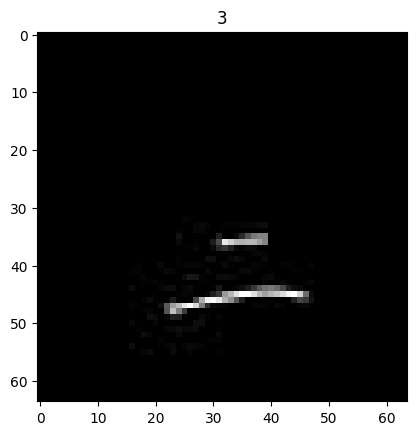

In [101]:
random.seed(time.time())
random_indices = int(random.random() * df.shape[0])
plt.imshow(df.iloc[random_indices]['image'], cmap='gray')
plt.title(df.iloc[random_indices]['class'])
plt.show()

## Train-test split

In [102]:
X_train_5k, X_test_5k, y_train_5k, y_test_5k = train_test_split(df['image'], df['class'], train_size=5000, test_size=1000, stratify=df['class'])
X_train_10k, X_test_10k, y_train_10k, y_test_10k = train_test_split(df['image'], df['class'], train_size=10000, test_size=1000, stratify=df['class'])

print(np.unique(y_train_5k, return_counts=True))
print(np.unique(y_test_5k, return_counts=True))
print(np.unique(y_train_10k, return_counts=True))
print(np.unique(y_test_10k, return_counts=True))

X_train_5k = np.array([x.flatten() for x in X_train_5k])
X_test_5k = np.array([x.flatten() for x in X_test_5k])
X_train_10k = np.array([x.flatten() for x in X_train_10k])
X_test_10k = np.array([x.flatten() for x in X_test_10k])


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([333, 334, 333, 334, 333, 333, 334, 334, 333, 333, 333, 333, 333,
       333, 334]))
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([67, 66, 67, 66, 67, 67, 66, 66, 67, 67, 67, 67, 67, 67, 66]))
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([666, 667, 667, 667, 667, 667, 667, 666, 666, 666, 666, 667, 667,
       667, 667]))
(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]), array([67, 67, 67, 66, 66, 66, 67, 67, 67, 67, 67, 66, 66, 67, 67]))


## Evaluation Function

In [103]:
def eval(prediction, y_test, title):
    accuracy = accuracy_score(y_test, prediction)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, prediction, average='macro')
    confusion_mat = confusion_matrix(y_test, prediction)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', ax=ax1)
    ax1.set_title('Confusion Matrix')
    ax1.set_ylabel('Actual')
    ax1.set_xlabel('Predicted')
    
    ax2.axis('off')
    table = ax2.table(cellText=[[accuracy], [precision], [recall], [f1_score]], rowLabels=['Accuracy', 'Precision', 'Recall', 'F1 Score'], loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax2.set_title('Evaluation Metrics')
    
    plt.suptitle(title, fontsize=16)
    plt.show()
    


## KNN

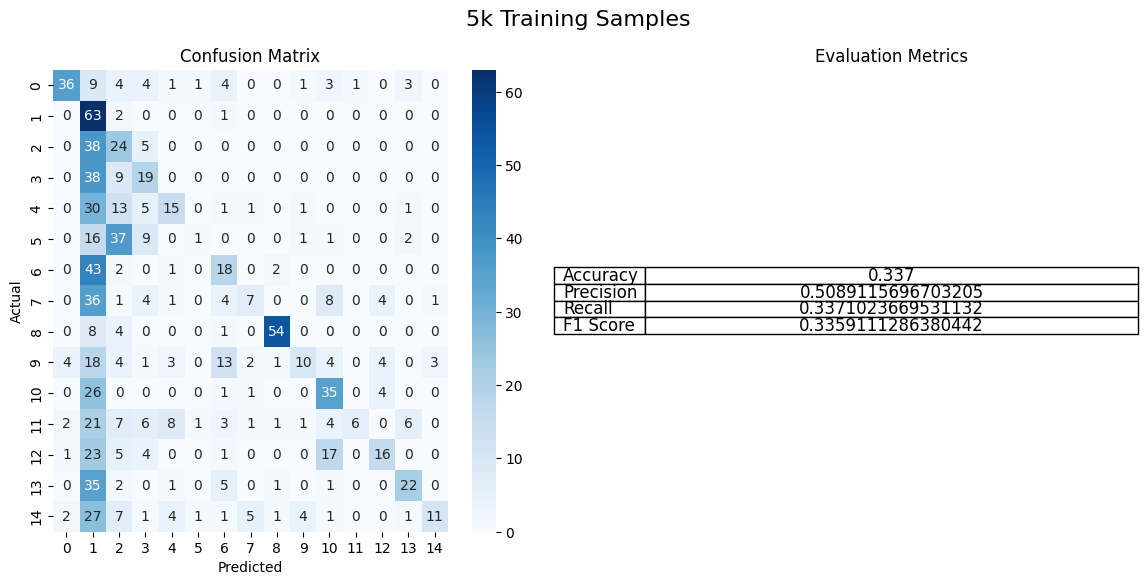

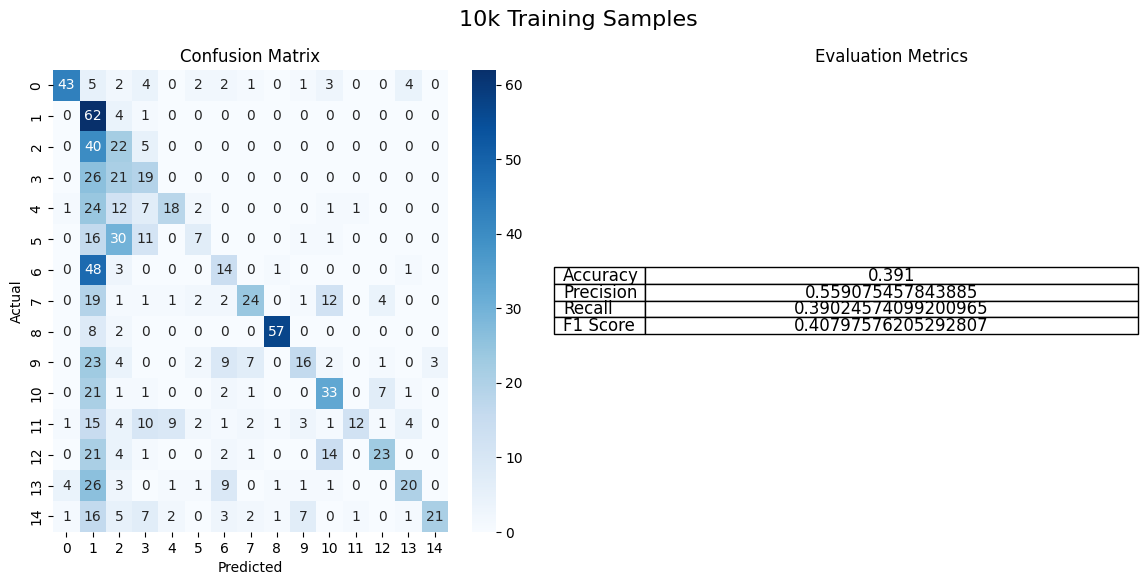

In [104]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_5k, y_train_5k)

y_test_predict_5k = KNN.predict(X_test_5k)
eval(y_test_predict_5k, y_test_5k, '5k Training Samples')

KNN.fit(X_train_10k, y_train_10k)

y_test_predict_10k = KNN.predict(X_test_10k)
eval(y_test_predict_10k, y_test_10k, '10k Training Samples')

## Decision Tree

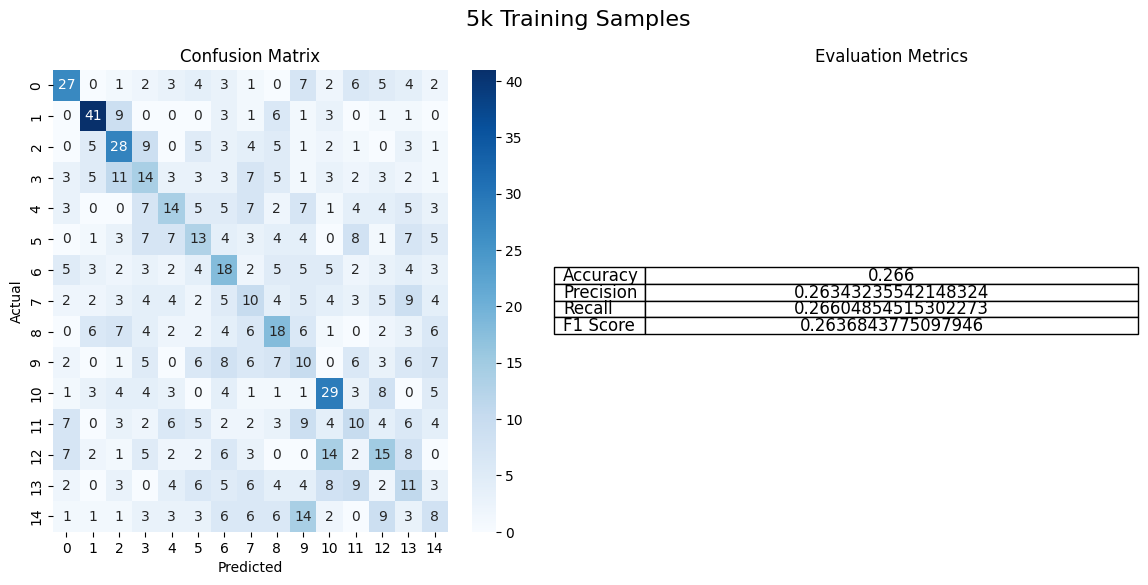

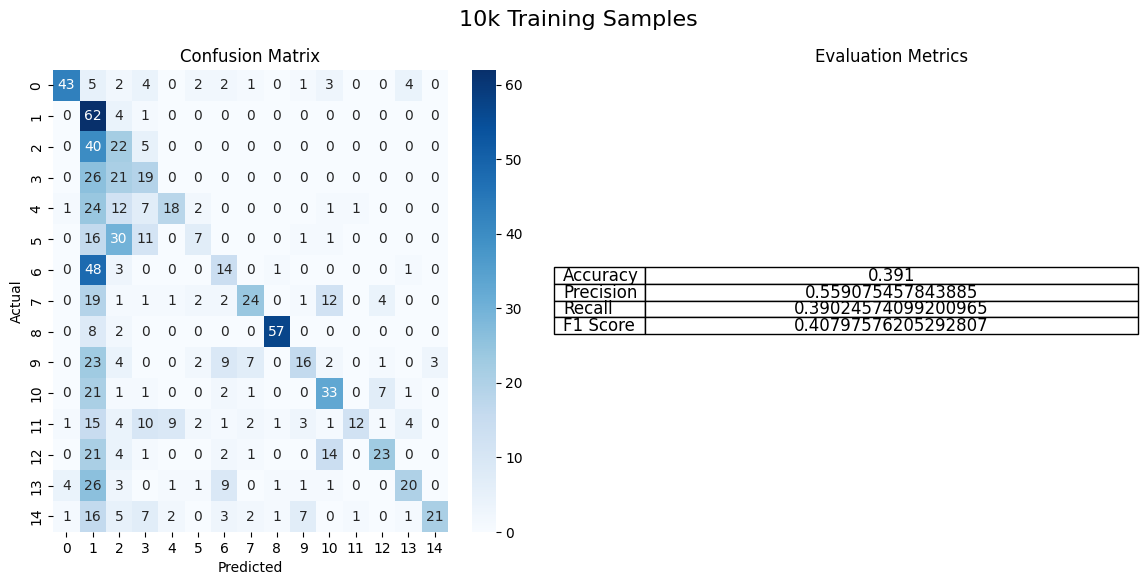

In [105]:
DT = DecisionTreeClassifier()
DT.fit(X_train_5k, y_train_5k)

y_test_predict_5k = DT.predict(X_test_5k)
eval(y_test_predict_5k, y_test_5k, '5k Training Samples')

DT.fit(X_train_10k, y_train_10k)
eval(y_test_predict_10k, y_test_10k, '10k Training Samples')

## Random Forest(FYI)

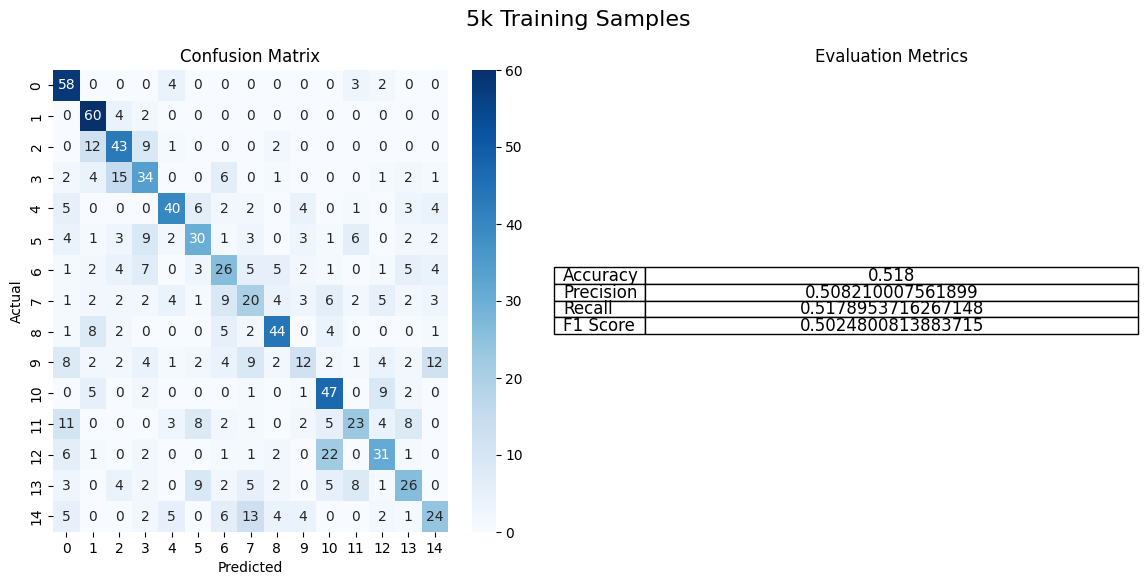

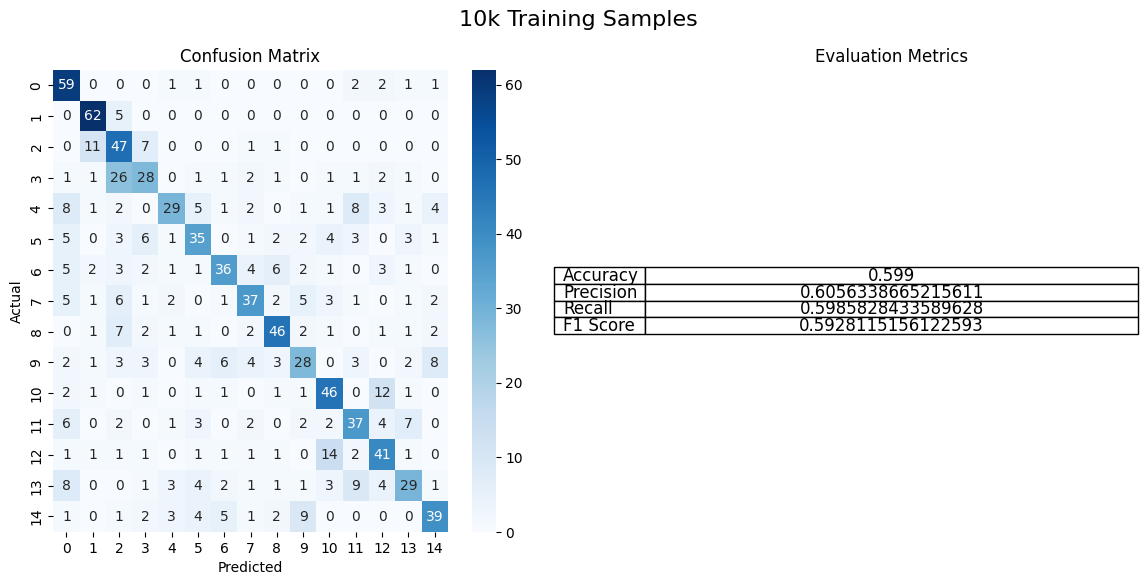

In [106]:
RF = RandomForestClassifier()

RF.fit(X_train_5k, y_train_5k)
y_test_predict_5k = RF.predict(X_test_5k)
eval(y_test_predict_5k, y_test_5k, '5k Training Samples')

RF.fit(X_train_10k, y_train_10k)
y_test_predict_10k = RF.predict(X_test_10k)
eval(y_test_predict_10k, y_test_10k, '10k Training Samples')

## SGD

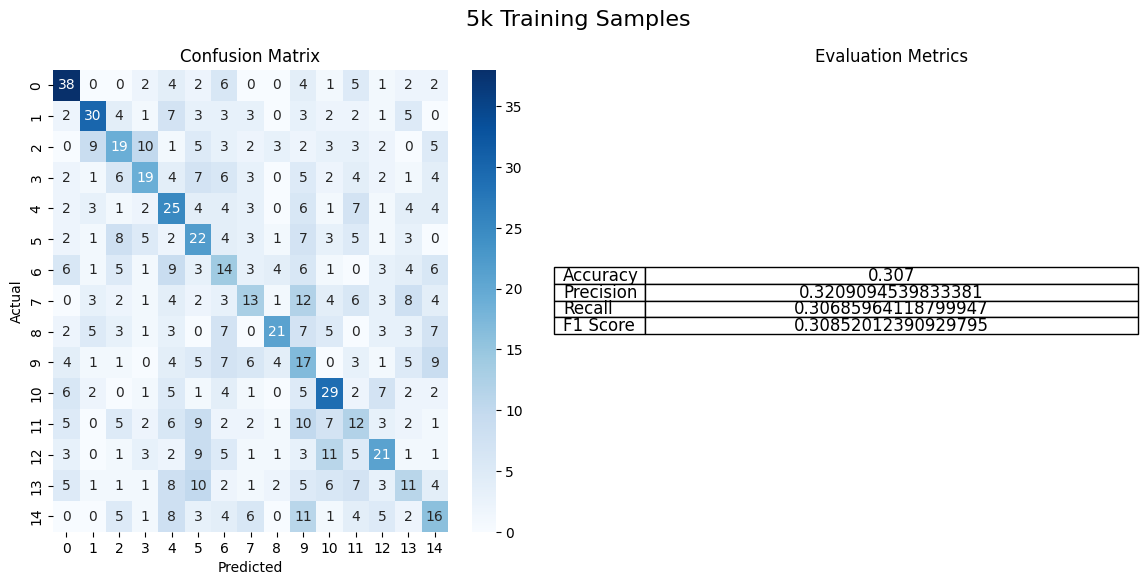

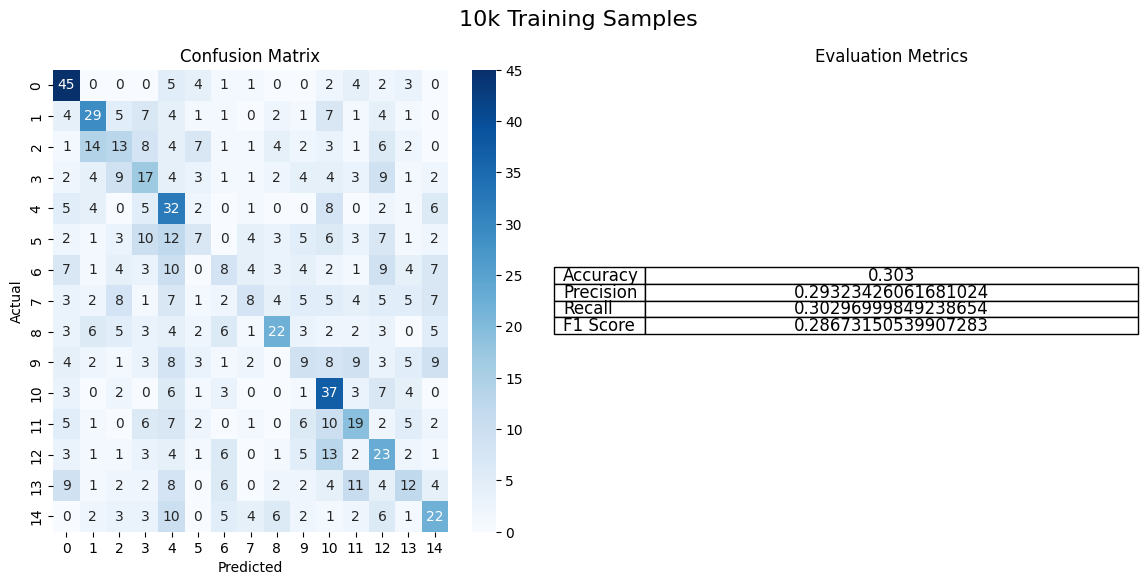

In [107]:
SGDClassifier = SGDClassifier(max_iter=250)

SGDClassifier.fit(X_train_5k, y_train_5k)
y_test_predict_5k = SGDClassifier.predict(X_test_5k)
eval(y_test_predict_5k, y_test_5k, '5k Training Samples')

SGDClassifier.fit(X_train_10k, y_train_10k)
y_test_predict_10k = SGDClassifier.predict(X_test_10k)
eval(y_test_predict_10k, y_test_10k, '10k Training Samples')

## CNN(FYI)

In [148]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print('Using device:', device)

num_epoch = 250
learning_rate = 1e-3

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(8, 4, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 15)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, x.size(1) * x.size(2) * x.size(3))
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Using device: mps


In [139]:
data = torch.from_numpy(X_train_5k.reshape(-1, 1, 64, 64)).float().to(device)
targets = torch.from_numpy(y_train_5k.to_numpy() - 1).to(device)

for epoch in range(num_epoch):
    print(f"Epoch [{epoch + 1}/{num_epoch}]")
    
    scores = model(data)
    loss = criterion(scores, targets)
    print(loss)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    
torch.save(model.state_dict(), '5k_model.pth')

Epoch [1/250]
tensor(3.3572, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [2/250]
tensor(2.7768, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [3/250]
tensor(2.5545, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [4/250]
tensor(2.3912, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [5/250]
tensor(2.2750, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [6/250]
tensor(2.1706, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [7/250]
tensor(2.0545, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [8/250]
tensor(1.9494, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [9/250]
tensor(1.8598, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [10/250]
tensor(1.7693, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [11/250]
tensor(1.6731, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [12/250]
tensor(1.5826, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [13/250]
tensor(1.5030, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [14/250]
tensor(1.4282, device='mps:0', g

In [149]:
data = torch.from_numpy(X_train_10k.reshape(-1, 1, 64, 64)).float().to(device)
targets = torch.from_numpy(y_train_10k.to_numpy() - 1).to(device)

for epoch in range(num_epoch):
    print(f"Epoch [{epoch + 1}/{num_epoch}]")
    
    scores = model(data)
    loss = criterion(scores, targets)
    print(loss)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()
    
torch.save(model.state_dict(), '10k_model.pth')

Epoch [1/250]
tensor(3.1620, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [2/250]
tensor(2.7473, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [3/250]
tensor(2.5659, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [4/250]
tensor(2.4384, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [5/250]
tensor(2.3187, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [6/250]
tensor(2.2030, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [7/250]
tensor(2.0896, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [8/250]
tensor(1.9770, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [9/250]
tensor(1.8676, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [10/250]
tensor(1.7669, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [11/250]
tensor(1.6788, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [12/250]
tensor(1.6026, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [13/250]
tensor(1.5342, device='mps:0', grad_fn=<NllLossBackward0>)
Epoch [14/250]
tensor(1.4678, device='mps:0', g

/var/folders/64/cy9kvd894_bfkfb71dsbxt2w0000gn/T/ipykernel_9314/1583843556.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_5k.load_state_dict(torch.load('5k_model.

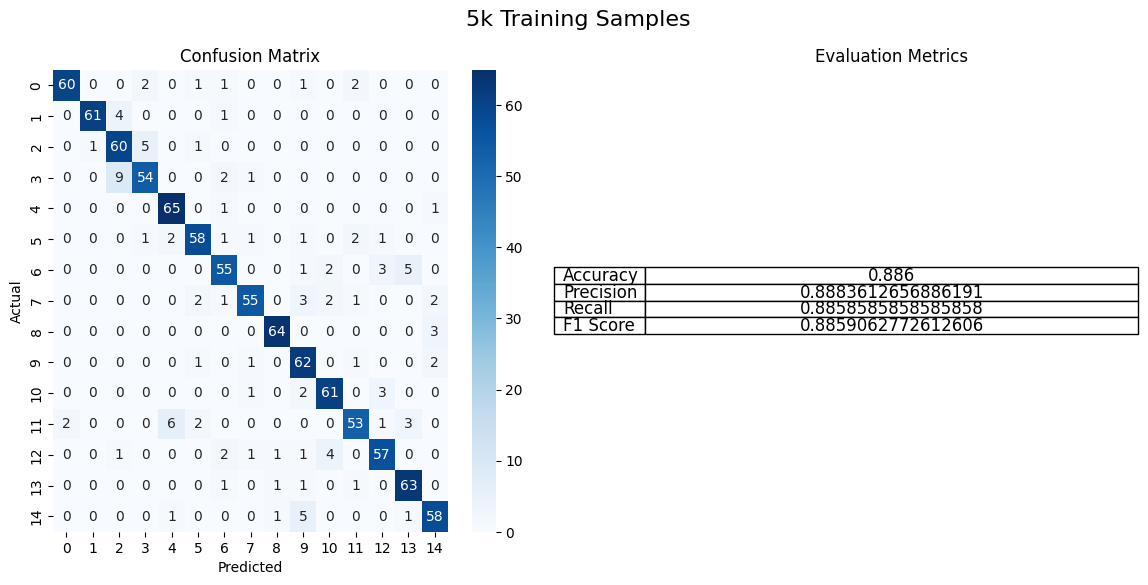

/var/folders/64/cy9kvd894_bfkfb71dsbxt2w0000gn/T/ipykernel_9314/1583843556.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_10k.load_state_dict(torch.load('10k_mod

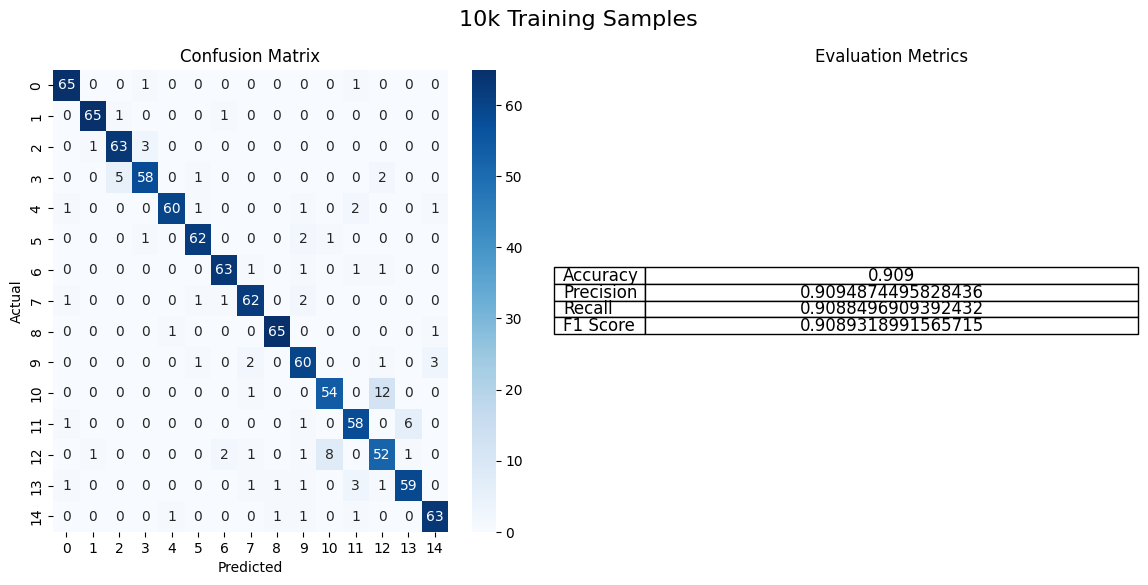

In [150]:
model_5k = CNN().to(device)                  # Instantiate the model architecture
model_5k.load_state_dict(torch.load('5k_model.pth'))  # Load the state dictionary
model_5k.eval()     

data = torch.from_numpy(X_test_5k.reshape(-1, 1, 64, 64)).float().to(device)
y_test_predict_5k = model_5k(data.to(device)).argmax(dim=1).cpu().numpy()
eval(y_test_predict_5k + 1, y_test_5k, '5k Training Samples')

model_10k = CNN().to(device)                  # Instantiate the model architecture
model_10k.load_state_dict(torch.load('10k_model.pth'))  # Load the state dictionary
model_10k.eval()     

data = torch.from_numpy(X_test_10k.reshape(-1, 1, 64, 64)).float().to(device)
y_test_predict_10k = model_10k(data.to(device)).argmax(dim=1).cpu().numpy()
eval(y_test_predict_10k + 1, y_test_10k, '10k Training Samples')

### Reference  
https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
https://datascience.stackexchange.com/questions/82863/how-to-split-train-test-datasets-having-equal-classes-proportion  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  
https://github.com/boring180/COMP5212_project



Copyright: This notebook is provided as part of the COMP9517 Computer Vision course at UNSW Sydney. This notebook can be used, modified and shared for educational purposes.

Borong Xu  
The Hong Kong University of Science and Technology  
Program of Computer Engineering  
https://boring180.github.io/